In [2]:
%matplotlib notebook
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

#%matplotlib inline
def add_layer(inputs, in_size, out_size, activation_function=None):
    #因为在生成初始参数时，随机变量(normal distribution)会比全部为0要好很多，所以我们这里的weights为一个in_size行, out_size列的随机变量矩阵。
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    #在机器学习中，biases的推荐值不为0，所以我们这里是在0向量的基础上又加了0.1。
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    #当activation_function——激励函数为None时，输出就是当前的预测值——Wx_plus_b，不为None时，就把Wx_plus_b传到activation_function()函数中得到输出。
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    
    return outputs

/home/yonah/.pyenv/versions/2.7.8/envs/ml/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:

x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]#[:, np.newaxis]将1维数组变成2维数组
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)# 噪音，用于模拟真实数据
y_data = np.square(x_data) - 0.5 + noise

# tf.placeholder()就是代表占位符，这里的None代表无论输入有多少都可以，因为输入只有一个特征，所以这里是1。
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

#隐藏层
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
#输出层
prediction = add_layer(l1, 10, 1, activation_function=None)
#计算预测值prediction和真实值的误差，对二者差的平方求和再取平均。
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()  #初始化变量
sess = tf.Session()
sess.run(init)

for i in range(1000):
    # training
    # (注意：当运算要用到placeholder时，就需要feed_dict这个字典来指定输入。)
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to see the step improvement
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))

0.468877
0.00856383
0.00619488
0.00531384
0.00484646
0.0045185
0.00427655
0.00409827
0.00393803
0.00382068
0.00370817
0.00360567
0.00350885
0.00342293
0.00334854
0.00328544
0.00322375
0.00316112
0.00311503
0.0030763


<IPython.core.display.Javascript object>


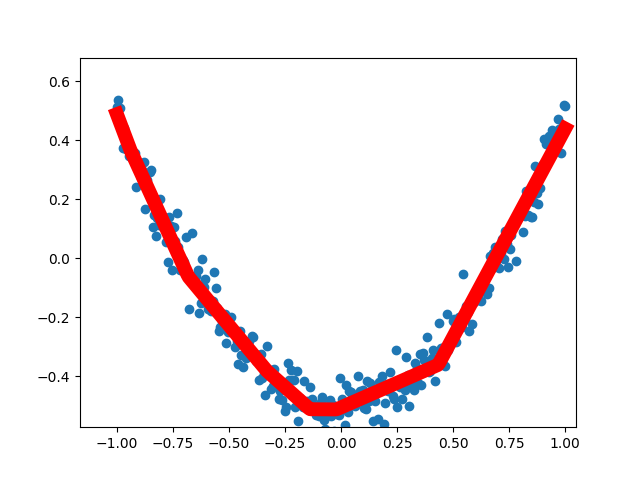

In [19]:
# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            plt.pause(0.5)
        except Exception:
            pass

        try:


            ax.lines.remove(lines[0])
            plt.show()
        except Exception as e:
            pass
            #print (str(e))

        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=10)

<IPython.core.display.Javascript object>


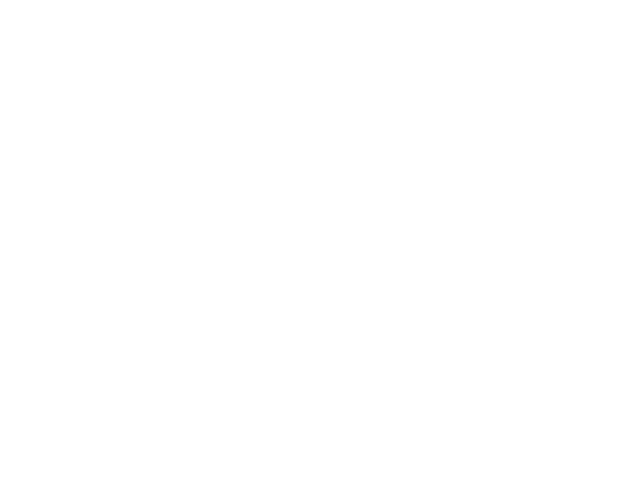

<IPython.core.display.Javascript object>


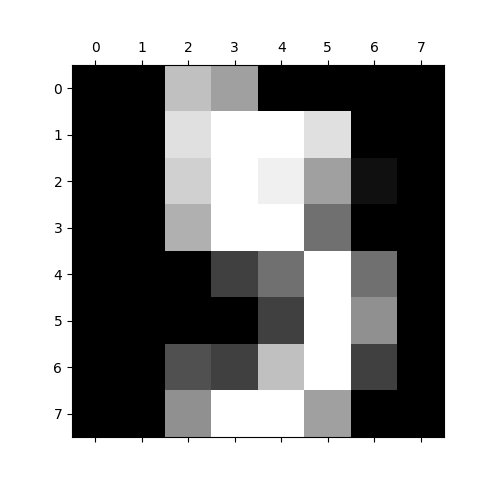

In [8]:

import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer
digits = load_digits()
plt.gray() 
plt.matshow(digits.images[5]) 
plt.show() 

In [9]:
digits.target[5]

5

In [14]:
X = digits.data
y = digits.target
y = LabelBinarizer().fit_transform(y)
y.shape

(1797, 10)